In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [11]:
print("hello world!")

hello world!


In [34]:
from matplotlib import pyplot as plt
import cartopy
import earthaccess
import numpy as np
import xarray as xr

In [35]:
import os
directory_path = "/Users/ashrayuddaraju/Documents/GitHub/nsa25_practice/nasa_data/2002"
all_files = sorted(os.listdir(directory_path))


In [36]:

all_files

['AQUA_MODIS.20020704_20020711.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020712_20020719.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020720_20020727.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020728_20020804.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020805_20020812.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020813_20020820.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020821_20020828.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020829_20020905.L3m.8D.CHL.chlor_a.9km.nc',
 'AQUA_MODIS.20020906_20020913.L3m.8D.CHL.chlor_a.9km.nc']

In [37]:
def get_image_data(full_path):
    dataset = xr.open_dataset(full_path)
    # dataset
    array = np.log10(dataset["chlor_a"])
    array.attrs.update(
        {
            "units": f'log10({dataset["chlor_a"].attrs["units"]})',
        }
    )
    crs_proj = cartopy.crs.Robinson()
    crs_data = cartopy.crs.PlateCarree()
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(projection=crs_proj)
    array.plot(x="lon", y="lat", cmap="jet", ax=ax, robust=True, transform=crs_data)
    ax.coastlines()
    ax.set_title(dataset.attrs["product_name"])
    return fig

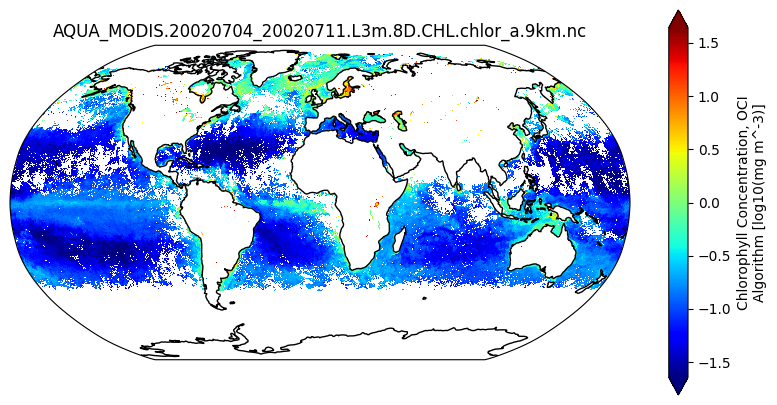

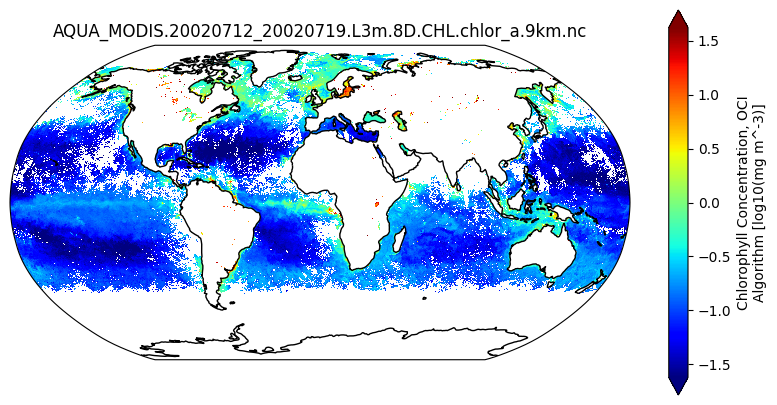

In [38]:
for file in all_files[0:2]:
    full_path = os.path.join(directory_path, file)
    get_image_data(full_path)

OSError: [Errno -101] NetCDF: HDF error: '/Users/ashrayuddaraju/Documents/GitHub/nsa25_practice/nasa_data/2002/AQUA_MODIS.20020906_20020913.L3m.8D.CHL.chlor_a.9km.nc'

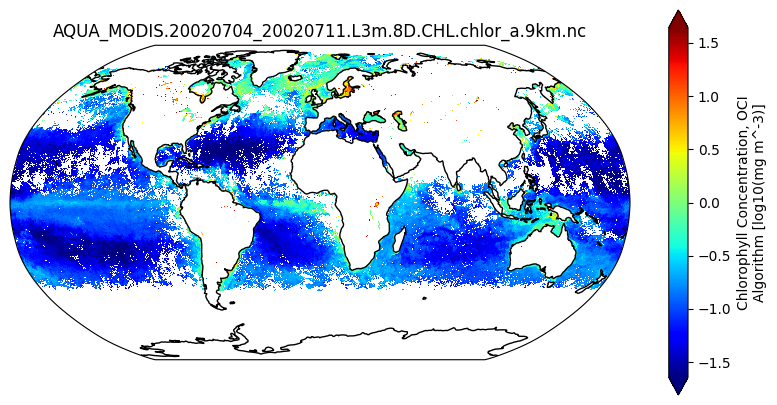

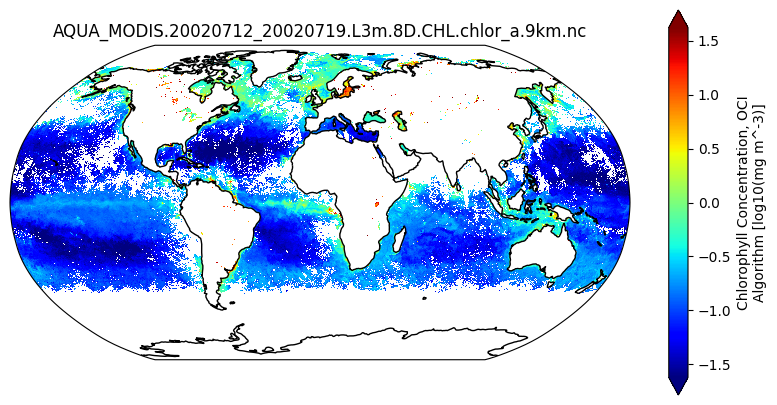

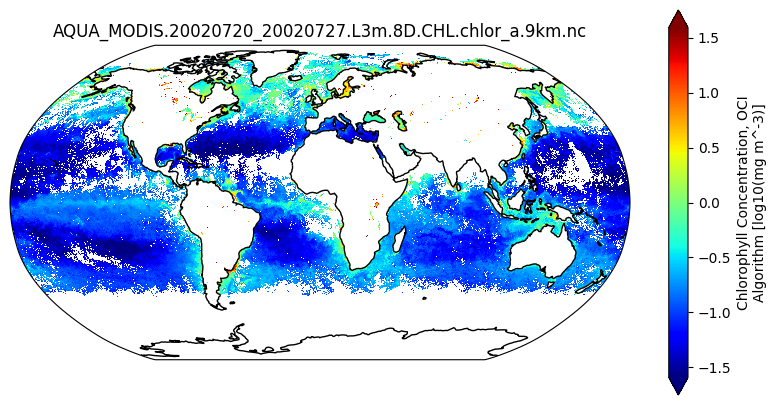

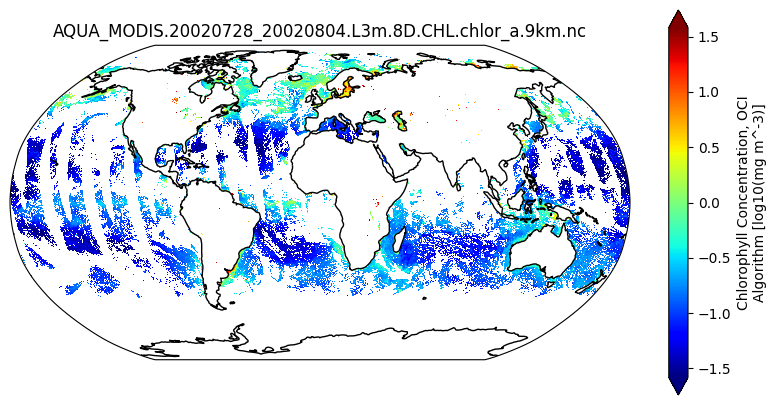

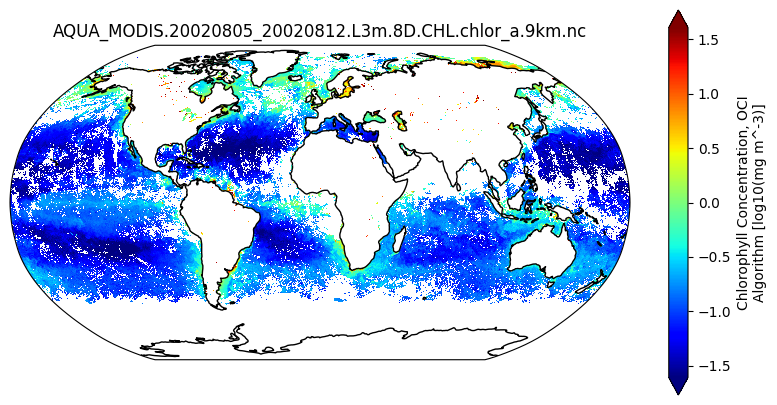

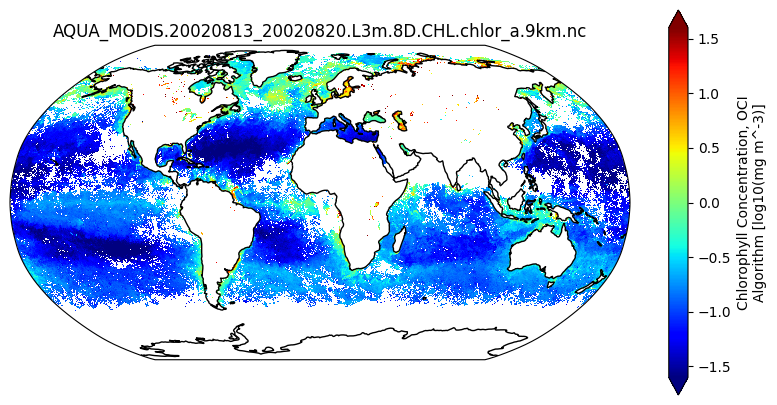

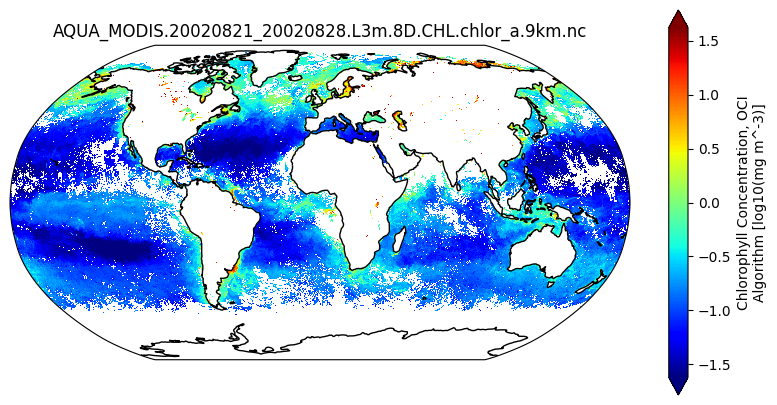

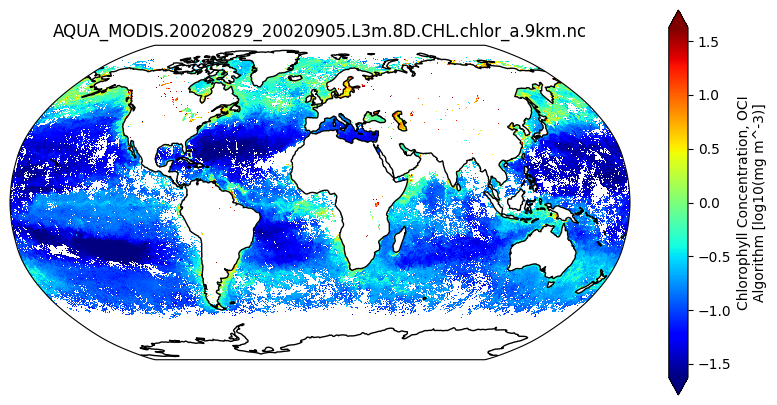

In [39]:
# Generate a df and store it in a file
images_directory = "/Users/ashrayuddaraju/Documents/GitHub/nsa25_practice/nasa_data/images"
all_images = []

def save_images(nasa_data_directory, output_directory):
    all_files = sorted(os.listdir(nasa_data_directory))
    all_files
    for file in all_files:
        full_path = os.path.join(directory_path, file)
        image = get_image_data(full_path)
        # Save the figure to a file named similar to the input filename
        output_filename = os.path.splitext(file)[0] + "_image.png"
        output_path = os.path.join(output_directory, output_filename)
        image.savefig(output_path)
        all_images.append(image)

save_images(directory_path, images_directory)



In [40]:
# Generate a dataframe from all the images
import glob
from PIL import Image
from datetime import datetime
import pandas as pd


def get_start_date_from_filename(filename: str) -> datetime.date:
    try:
        # Split the filename by the dot separator.
        # The date range is expected to be the second element (index 1).
        parts = filename.split('.')
        date_range_part = parts[1]

        # Split the date range part by the underscore separator.
        # The start date is the first part.
        start_date_str = date_range_part.split('_')[0]
        start_date_str
        # Convert the 'YYYYMMDD' string to a datetime object and then to a date object.
        # start_date = datetime.strptime(start_date_str, "%Y%m%d").date()
        # start_date = datetime.strptime(start_date_str, '%Y%m%d')
        start_date = datetime.strptime(start_date_str, '%Y%m%d')
        # st.write(start_date)
        
        return start_date
    except (IndexError, ValueError, AttributeError) as e:
        # Handle cases where the filename format or date conversion is not as expected.
        return None

def serialize_df(directory_path):
    # Serialize the DataFrame to a file
    all_files = sorted(os.listdir(directory_path))
    nasa_aqua_images = []
    start_dates = []
    for file in all_files:
        full_path = os.path.join(directory_path, file)
        start_date = get_start_date_from_filename(file)
        image = Image.open(full_path)
        nasa_aqua_images.append(image)
        start_dates.append(start_date)
    data = {'filename': all_files, 
            'start_date': start_dates,
            'image_data': nasa_aqua_images,
            }
    df = pd.DataFrame(data)
    return df
    # df.to_pickle(file_path)
    # print(f"DataFrame serialized to {file_path}")

serialize_df(images_directory)

,filename,start_date,image_data
0,AQUA_MODIS.20020704_20020711.L3m.8D.CHL.chlor_...,2002-07-04,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,AQUA_MODIS.20020712_20020719.L3m.8D.CHL.chlor_...,2002-07-12,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,AQUA_MODIS.20020720_20020727.L3m.8D.CHL.chlor_...,2002-07-20,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,AQUA_MODIS.20020728_20020804.L3m.8D.CHL.chlor_...,2002-07-28,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,AQUA_MODIS.20020805_20020812.L3m.8D.CHL.chlor_...,2002-08-05,<PIL.PngImagePlugin.PngImageFile image mode=RG...
5,AQUA_MODIS.20020813_20020820.L3m.8D.CHL.chlor_...,2002-08-13,<PIL.PngImagePlugin.PngImageFile image mode=RG...
6,AQUA_MODIS.20020821_20020828.L3m.8D.CHL.chlor_...,2002-08-21,<PIL.PngImagePlugin.PngImageFile image mode=RG...
7,AQUA_MODIS.20020829_20020905.L3m.8D.CHL.chlor_...,2002-08-29,<PIL.PngImagePlugin.PngImageFile image mode=RG...
8,modis_animation_2002_5fps.gif,NaT,<PIL.GifImagePlugin.GifImageFile image mode=P ...
9,modis_animation_2004_2fps.gif,NaT,<PIL.GifImagePlugin.GifImageFile image mode=P ...


In [41]:
# Generate a dataframe from all the images
# import glob
# from PIL import Image
# from datetime import datetime
# import pandas as pd


# def get_start_date_from_filename(filename: str) -> datetime.date:
#     try:
#         # Split the filename by the dot separator.
#         # The date range is expected to be the second element (index 1).
#         parts = filename.split('.')
#         date_range_part = parts[1]

#         # Split the date range part by the underscore separator.
#         # The start date is the first part.
#         start_date_str = date_range_part.split('_')[0]

#         # Convert the 'YYYYMMDD' string to a datetime object and then to a date object.
#         # start_date = datetime.strptime(start_date_str, "%Y%m%d").date()
#         # start_date = datetime.strptime(start_date_str, '%Y%m%d')
#         start_date = datetime.strptime(start_date_str, '%Y%m%d')
#         # st.write(start_date)
        
#         return start_date
#     except (IndexError, ValueError, AttributeError) as e:
#         st.write(e)
#         # Handle cases where the filename format or date conversion is not as expected.
#         return None

# def serialize_df(directory_path):
#     # Serialize the DataFrame to a file
#     all_files = sorted(os.listdir(directory_path))
#     nasa_aqua_images = []
#     start_dates = []
#     for file in all_files:
#         full_path = os.path.join(directory_path, file)
#         start_date = get_start_date_from_filename(file)
#         image = Image.open(full_path)
#         nasa_aqua_images.append(image)
#         start_dates.append(start_date)
#     data = {'filename': all_files, 
#             'start_date': start_dates,
#             'image': nasa_aqua_images,
#             }
#     df = pd.DataFrame(data)
#     return df
#     # df.to_pickle(file_path)
#     # print(f"DataFrame serialized to {file_path}")

# serialize_df(images_directory)

In [42]:
nasa_data_pickle_file_path = "/Users/ashrayuddaraju/Documents/GitHub/nsa25_practice/nasa_data/nasa_data_df.pkl"
df = serialize_df(images_directory)
df.to_pickle(nasa_data_pickle_file_path)

In [43]:
read_df = pd.read_pickle(nasa_data_pickle_file_path)
read_df

,filename,start_date,image_data
0,AQUA_MODIS.20020704_20020711.L3m.8D.CHL.chlor_...,2002-07-04,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,AQUA_MODIS.20020712_20020719.L3m.8D.CHL.chlor_...,2002-07-12,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,AQUA_MODIS.20020720_20020727.L3m.8D.CHL.chlor_...,2002-07-20,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,AQUA_MODIS.20020728_20020804.L3m.8D.CHL.chlor_...,2002-07-28,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,AQUA_MODIS.20020805_20020812.L3m.8D.CHL.chlor_...,2002-08-05,<PIL.PngImagePlugin.PngImageFile image mode=RG...
5,AQUA_MODIS.20020813_20020820.L3m.8D.CHL.chlor_...,2002-08-13,<PIL.PngImagePlugin.PngImageFile image mode=RG...
6,AQUA_MODIS.20020821_20020828.L3m.8D.CHL.chlor_...,2002-08-21,<PIL.PngImagePlugin.PngImageFile image mode=RG...
7,AQUA_MODIS.20020829_20020905.L3m.8D.CHL.chlor_...,2002-08-29,<PIL.PngImagePlugin.PngImageFile image mode=RG...
8,modis_animation_2002_5fps.gif,NaT,<PIL.GifImagePlugin.GifImageFile image mode=P ...
9,modis_animation_2004_2fps.gif,NaT,<PIL.GifImagePlugin.GifImageFile image mode=P ...
